In [1]:
import math
import json
import xarray as xr
import numpy as np
import geopandas as gpd

from xcube.core.geom import rasterize_features

<AxesSubplot:>

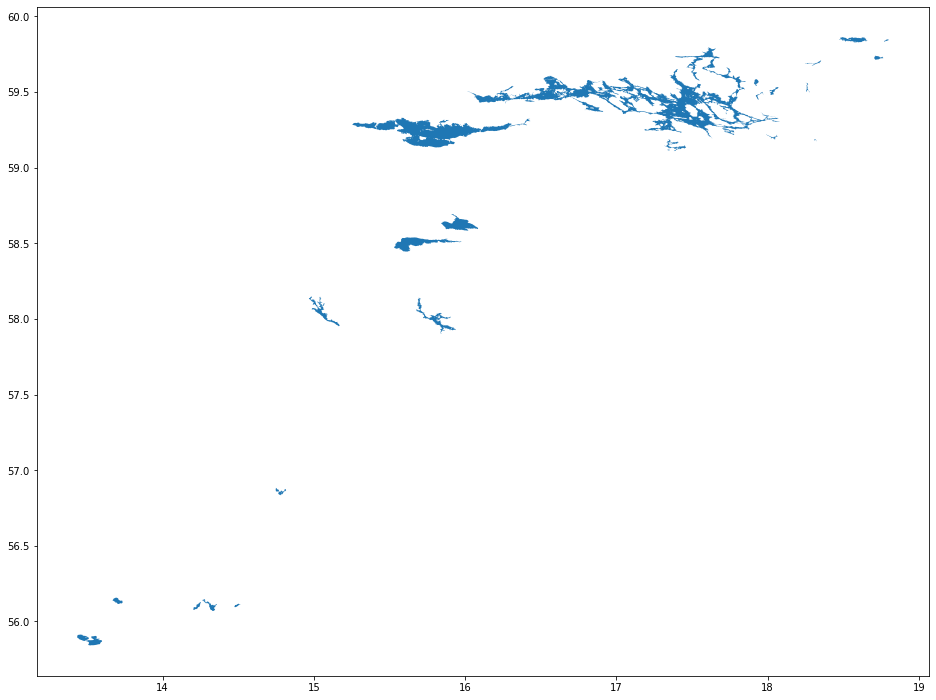

In [2]:
with open('../../serve/demo/places/Sweden-Lakes.geojson') as fp:
    features = json.load(fp)
features

features = gpd.GeoDataFrame.from_features(features)
features.plot(figsize=(16, 16))

In [3]:
x_min = 15
x_max = 19
y_min = 59
y_max = 60

width = 10000

spatial_res = (x_max - x_min) / width
height = math.ceil((y_max - y_min) / spatial_res)

d = spatial_res / 2
lon = xr.DataArray(np.linspace(x_min + d, x_max - d, width), dims="lon")
lat = xr.DataArray(np.linspace(y_min + d, y_max - d, height), dims="lat")
lat = lat[::-1]
dataset = xr.Dataset(coords=dict(lon=lon, lat=lat))
dataset

<xarray.Dataset>
Dimensions:  (lon: 10000, lat: 2500)
Coordinates:
  * lon      (lon) float64 15.0 15.0 15.0 15.0 15.0 ... 19.0 19.0 19.0 19.0 19.0
  * lat      (lat) float64 60.0 60.0 60.0 60.0 60.0 ... 59.0 59.0 59.0 59.0 59.0
Data variables:
    *empty*

In [4]:
rasterized_features = rasterize_features(dataset, features, ['Medeldjup', 'Maxdjup'], tile_size=1000, all_touched=True) 
rasterized_features

<xarray.Dataset>
Dimensions:    (lon: 10000, lat: 2500)
Coordinates:
  * lon        (lon) float64 15.0 15.0 15.0 15.0 15.0 ... 19.0 19.0 19.0 19.0
  * lat        (lat) float64 60.0 60.0 60.0 60.0 60.0 ... 59.0 59.0 59.0 59.0
Data variables:
    Medeldjup  (lat, lon) float64 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    Maxdjup    (lat, lon) float64 dask.array<chunksize=(1000, 1000), meta=np.ndarray>

15.015.4 60.0 15.8 59.6
 60.0(15.4, 59.6, 15.8, 60.0) 15.4 59.6
15.8 60.0 16.2 59.6

(15.0, 59.6, 15.4, 60.0)16.2 60.0 16.6 59.6
16.6 60.0 17.0 59.6

17.0 (15.8, 59.6, 16.2, 60.0)60.0
 17.4 59.6
17.4 60.0 17.8 17.8 60.0 18.2 59.6
59.618.2 60.0 18.6 (16.6, 59.6, 17.0, 60.0)
(17.0, 59.6, 17.4, 60.0)
(16.2, 59.6, 16.6, 60.0)59.6
18.6
 
60.0 19.0 59.6
Shape is empty! (13.496103728727693, 55.84182945992873, 13.600015562546016, 55.90477705005571)
(17.8, 59.6, 18.2, 60.0)15.0 59.6 15.4 
59.2Shape is empty!15.4Shape is empty!
   (18.2, 59.6, 18.6, 60.0)59.6
 15.8 59.2
(13.496103728727693, 55.84182945992873, 13.600015562546016, 55.90477705005571)Shape is empty!
(18.6, 59.6, 19.0, 60.0)(13.496103728727693, 55.84182945992873, 13.600015562546016, 55.90477705005571)
 (13.496103728727693, 55.84182945992873, 13.600015562546016, 55.90477705005571)
Shape is empty! (13.435571829840281, 55.87110276962453, 13.512408867168775, 55.913280267776784)
(17.4, 59.6, 17.8, 60.0)

Shape is empty! (13.49610372872769

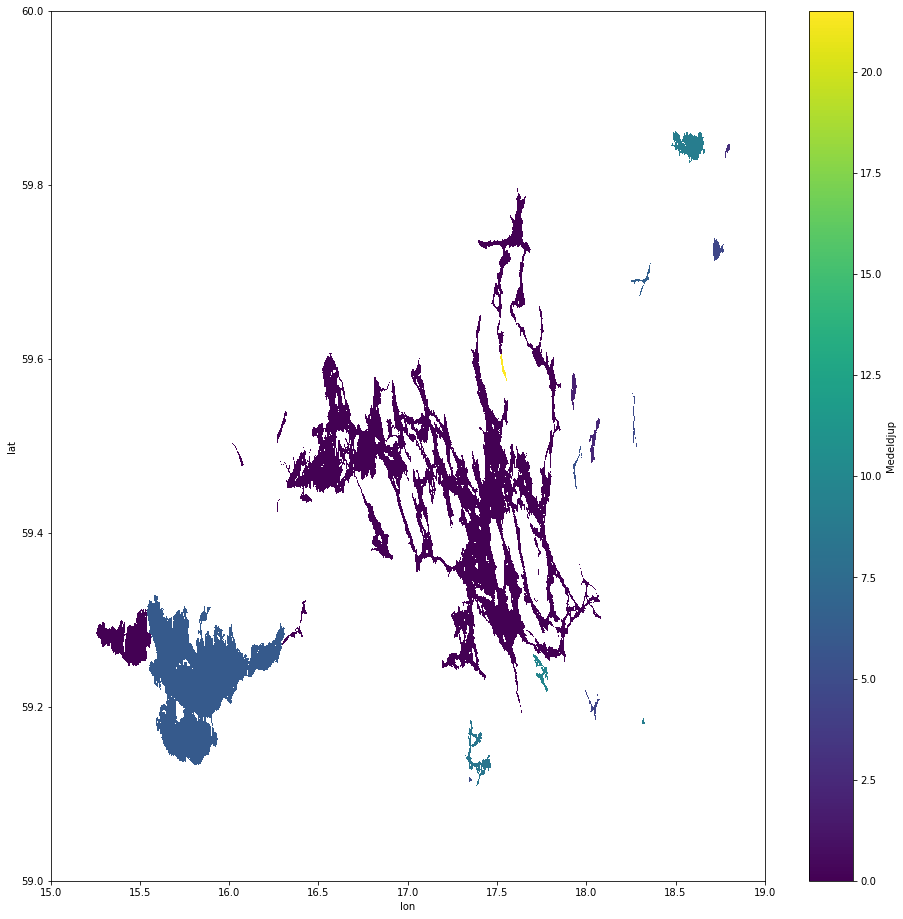

In [5]:
rasterized_features.Medeldjup.plot.imshow(figsize=(16, 16))